<a href="https://colab.research.google.com/github/mgopal64/SoilMoisturePrediction/blob/main/WRA_SM_MHACKS_VIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Visualizations for Random Forest Soil Moisture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df_encoded = pd.read_pickle('df_encoded.pkl')
print(df_encoded.head())

            timestamp  soil_moisture  temp  feelslike   dew  humidity  precip  \
0 2023-06-01 07:30:00       0.186852  14.3       14.3  10.2     76.31     0.0   
1 2023-06-01 10:30:00       0.190619  25.0       25.0  11.3     42.50     0.0   
2 2023-06-01 13:30:00       0.173114  30.3       28.7   7.7     24.40     0.0   
3 2023-06-01 16:30:00       0.174372  31.3       29.5   7.7     22.99     0.0   
4 2023-06-01 19:30:00       0.172633  29.7       28.2   7.1     24.10     0.0   

   precipprob  windgust  windspeed  ...  solarradiation_log  solarenergy_log  \
0           0      10.4        7.4  ...            3.951244         0.182322   
1           0      16.9        5.7  ...            6.333280         1.098612   
2           0      27.7       19.8  ...            6.801283         1.435085   
3           0      35.3       16.1  ...            6.651572         1.335001   
4           0      26.3       15.3  ...            5.736572         0.741937   

   soil_moisture_lag1  soil_mois

In [ ]:
# train model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df_encoded.drop(['soil_moisture', 'soil_moisture_log', 'soil_moisture_roll3',
                     'soil_moisture_lag1','soil_moisture_lag1_log','soil_moisture_roll3_log','timestamp'], axis=1)          # target
               # direct transformation of target


y = df_encoded['soil_moisture']   # or 'soil_moisture_log' if that's your target


# 80/20 split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Initialize and train the Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")


RMSE: 0.04
R^2: 0.02


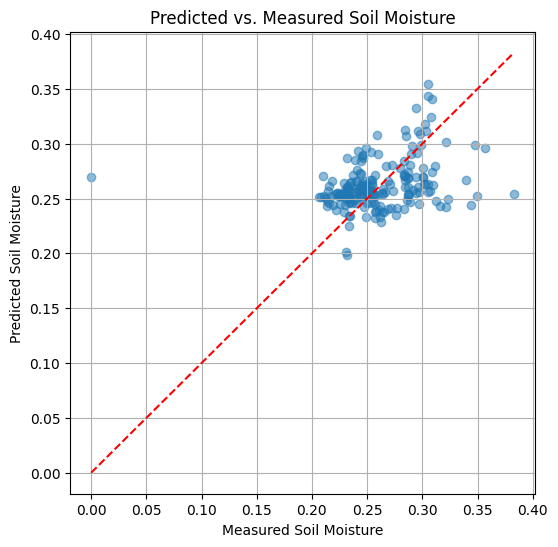

In [ ]:
import matplotlib.pyplot as plt

# y_test: actual soil moisture values
# y_pred: predicted soil moisture values from your RF model
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # identity line
plt.xlabel('Measured Soil Moisture')
plt.ylabel('Predicted Soil Moisture')
plt.title('Predicted vs. Measured Soil Moisture')
plt.grid(True)
plt.show()

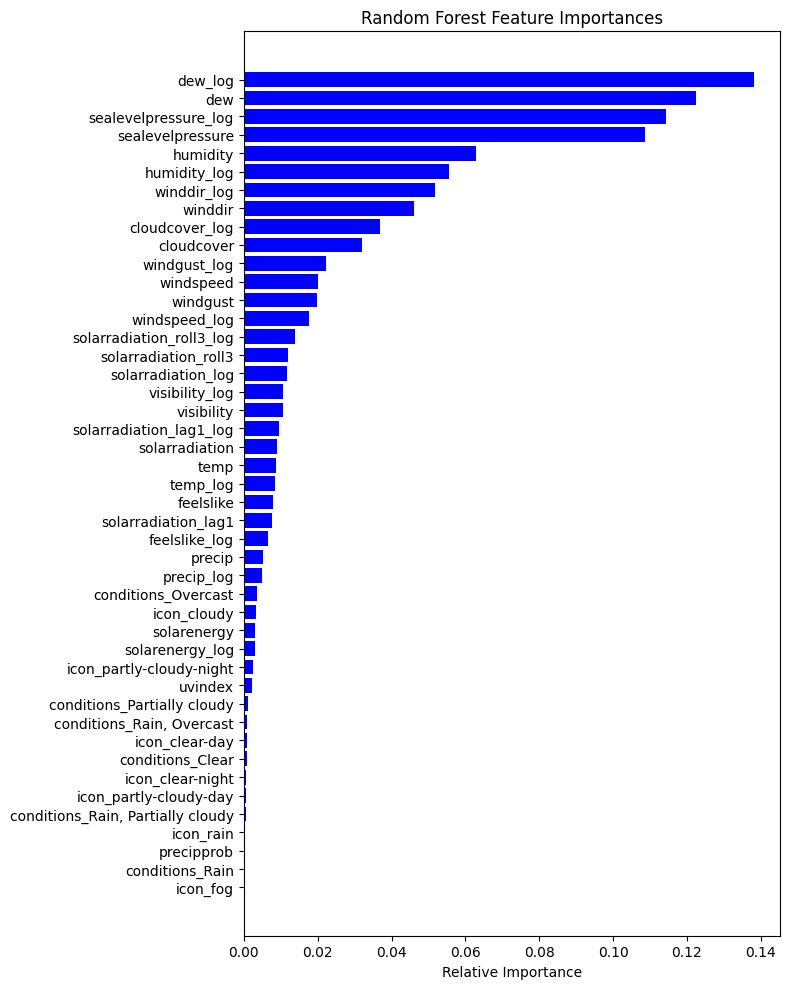

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# rf: your trained RandomForestRegressor
# X: your feature DataFrame
importances = rf.feature_importances_
feature_names = X.columns

# Sort features by importance
indices = np.argsort(importances)

plt.figure(figsize=(8, 10))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()
